In [1]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
nolimits = pd.read_csv('baseline.csv')
nolimits['limits'] = False
withlimits = pd.read_csv('with_limits.csv')
withlimits['limits'] = True
df = pd.concat([nolimits, withlimits], ignore_index=True)

In [13]:
df.head()

,repetition,machine,benchmark,job,read_bw,write_bw,read_iops,write_iops,elapsed,limits
0,5,issdm-47,fio,rw-sdb-4k-seq,2990,2996,747.59,749.16,36,False
1,5,issdm-14,fio,rw-sdb-4k-seq,2955,2954,738.78,738.51,36,False
2,5,issdm-38,fio,rw-sdb-4k-seq,2929,2930,732.30,732.64,36,False
3,5,issdm-20,fio,rw-sdb-4k-seq,3135,3130,783.75,782.58,36,False
4,5,issdm-27,fio,rw-sdb-4k-seq,2934,2934,733.70,733.64,36,False


In [21]:
len(df.machine.unique())

15

In [19]:
df.groupby('limits')['read_bw'].std()

limits
False    98.847955
True     32.235759
Name: read_bw, dtype: float64

In [22]:
df.groupby('limits')['write_bw'].std()

limits
False    97.443585
True     29.620136
Name: write_bw, dtype: float64

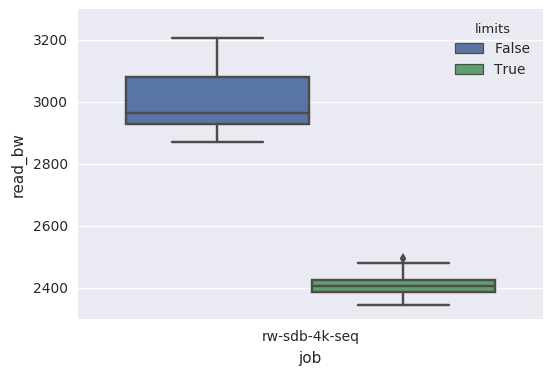

In [15]:
ax = sns.boxplot(x='job', y='read_bw', data=df, hue='limits')

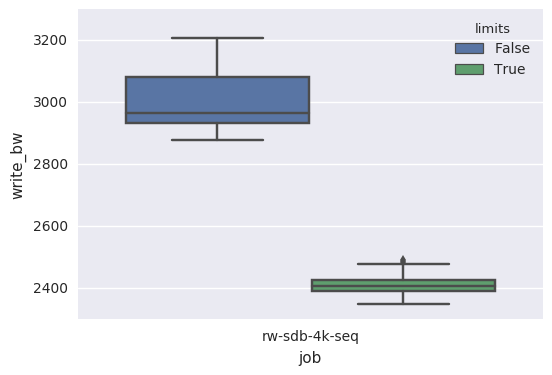

In [16]:
ax = sns.boxplot(x='job', y='write_bw', data=df, hue='limits')

Our results show that we reduce variability, at least by 3x. Let's codify this assertion:

In [27]:
print((df.query('limits == False')['read_bw'].std() / df.query('limits == True')['read_bw'].std()) >= 3.0)
print((df.query('limits == False')['write_bw'].std() / df.query('limits == True')['write_bw'].std()) >= 3.0)


True
True
